In [1]:
import random
import math
import numpy as np
np.set_printoptions(formatter={'float_kind':"{:-.3e}".format})
np.random.seed(0)
import importlib

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5, 4)

import torch
torch.manual_seed(0)

import torch.nn as nn
from torch.autograd import Variable

from core import _


In [2]:
import nn_tools.data_sources as ds
_ = importlib.reload(ds)
import models.sinus_ds as mo
_ = importlib.reload(mo)
import nn_tools.data_sequencer as cs
_ = importlib.reload(cs)
from nn_tools.data_sequencer import ContextSequencer

from nn_tools.data_sources import SinusDs
from models.sinus_ds import Model, NnDriver

In [3]:
training_end_index = 4000
data = SinusDs.Sinus(noise=0.03, stop=training_end_index)

ds = SinusDs(
        data, 
        (None, None),
        step=3,
        noise=0.03
        )

dr = NnDriver(
    data_source=ds,
    model_class=Model,
    future_count=15,
    verbose=True
    )

dr.train(data_count=500, end_index=len(data) - dr.future_count, verbose=False)

In [5]:
shift = 50

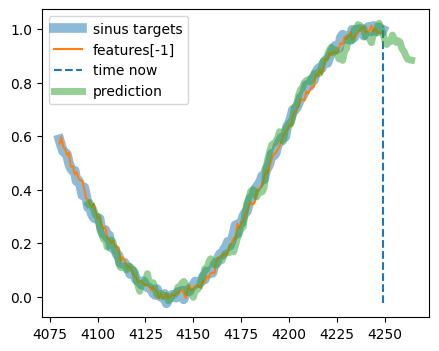

In [10]:
testing_end_index = training_end_index + shift
shift += 50

dr.context_seq.data_source.data = SinusDs.Sinus(
    noise=0.03, stop=testing_end_index)
dr.show_action(end_index=testing_end_index)